## This script contains:
#### 1. Hypothesis
#### 2. Import libraries and data
#### 3. Data cleaning
#### 4.1. Data prep for regression analysis
        GDP vs Score
#### 5.1. Regression analysis
        GDP vs Score
#### 4.2. Data prep for regression analysis
        Health vs Score
#### 5.2. Regression analysis
        Health vs Score
#### 4.3. Data prep for regression analysis
        Support vs Score
#### 5.3. Regression analysis
        Support vs Score
#### 6. Results

# 1. Hypothesis

#### If a country has a low score in GDP, Health, and Support, then they will have a low Happiness Score.

# 2. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create path to folder

path = r'C:\Users\ejgor\OneDrive\Data Analytics\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\World Happiness Report Analysis'

In [4]:
# import cleaned dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_2015-2019.csv'), index_col = False)

# 3. Data cleaning

In [5]:
df.columns

Index(['Country', 'Rank', 'Score', 'Support', 'GDP', 'Health', 'Freedom',
       'Generosity', 'Corruption', 'Year'],
      dtype='object')

In [6]:
df.head(20)

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [7]:
df.shape

(782, 10)

#### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country       0
Rank          0
Score         0
Support       0
GDP           0
Health        0
Freedom       0
Generosity    0
Corruption    0
Year          0
dtype: int64

#### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape

# no dups

(782,)

C:\Users\ejgor\AppData\Local\Temp\ipykernel_17072\3121644600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'], bins=25) # Shows extreme values


<Axes: xlabel='Score', ylabel='Density'>

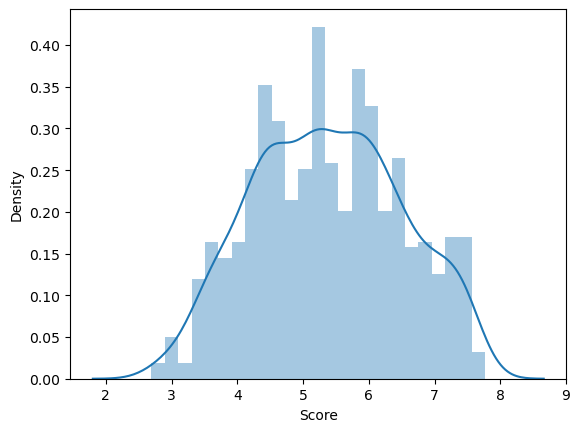

In [11]:
sns.distplot(df['Score'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['Score'].mean() # Check the mean

5.379017902998669

In [13]:
df['Score'].median() # Check the median

5.322

In [14]:
df['Score'].max() # Check the max

7.769

# 4.1. Data prep for regression analysis
#### GDP vs Score

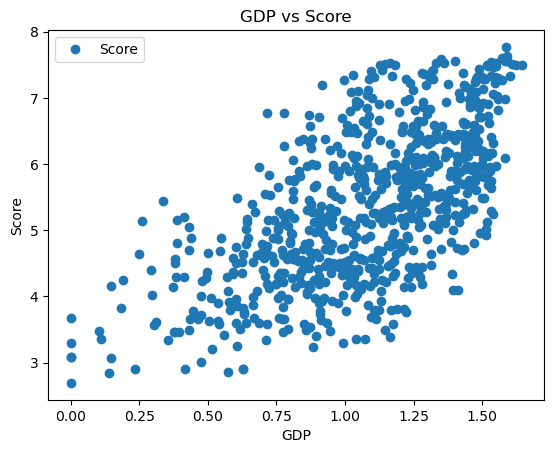

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP vs Score')  
plt.xlabel('GDP')  
plt.ylabel('Score')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [17]:
X

array([[1.34951   ],
       [1.40223   ],
       [1.36058   ],
       [1.33095   ],
       [1.32261   ],
       [1.31826   ],
       [1.28017   ],
       [1.28907   ],
       [1.31967   ],
       [1.30923   ],
       [1.22393   ],
       [1.23788   ],
       [1.29704   ],
       [0.91451   ],
       [1.24711   ],
       [1.23287   ],
       [1.21963   ],
       [1.36948   ],
       [1.28566   ],
       [1.12575   ],
       [1.28548   ],
       [1.08182   ],
       [1.25596   ],
       [1.02      ],
       [1.1985    ],
       [1.29937   ],
       [1.12447   ],
       [1.0786    ],
       [1.26038   ],
       [1.24823   ],
       [1.20643   ],
       [1.2089    ],
       [1.24018   ],
       [1.26504   ],
       [1.08393   ],
       [1.31379   ],
       [1.30203   ],
       [1.07617   ],
       [1.16594   ],
       [0.972     ],
       [1.18354   ],
       [1.02507   ],
       [1.04356   ],
       [1.34043   ],
       [1.26999   ],
       [1.25712   ],
       [0.95774   ],
       [0.999

In [18]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5.1. Regression analysis
#### GDP vs Score

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

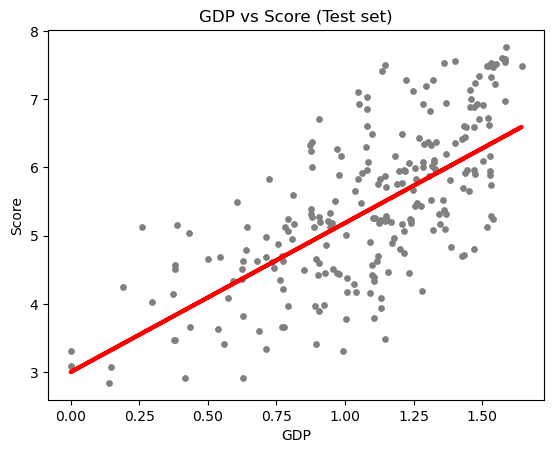

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP vs Score (Test set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Score')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.1871086]]
Mean squared error:  0.6997978715680674
R2 score:  0.4675009306538136


In [26]:
y_predicted

array([[5.96805009],
       [6.21614621],
       [5.81301311],
       [5.72647447],
       [5.19187952],
       [4.55514932],
       [5.41566447],
       [4.72928418],
       [5.30081939],
       [4.32886833],
       [5.64290505],
       [4.91737552],
       [4.55394368],
       [6.31675321],
       [3.90846232],
       [4.57787065],
       [5.80163095],
       [5.20238577],
       [5.62814207],
       [5.74136338],
       [4.92277767],
       [5.01542359],
       [5.45284531],
       [5.99087403],
       [5.3579248 ],
       [6.38455358],
       [5.60375581],
       [6.43923129],
       [3.9509575 ],
       [6.2883208 ],
       [5.84871197],
       [5.79184715],
       [5.74908917],
       [4.22369028],
       [6.22489465],
       [5.12259192],
       [2.99890947],
       [4.93642523],
       [5.80856985],
       [5.58743998],
       [5.08915102],
       [6.1591136 ],
       [6.34299851],
       [5.06861407],
       [6.34955984],
       [5.88517107],
       [6.17459115],
       [4.920

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.968050
1,6.886,6.216146
2,6.344,5.813013
3,7.119,5.726474
4,3.781,5.191880
5,4.692,4.555149
6,4.390,5.415664
7,5.061,4.729284
8,6.929,5.300819
9,5.488,4.328868


#### Compare how the regression fits the training set

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.1871086]]
Mean squared error:  0.7511443382175684
R2 score:  0.39838702760767375


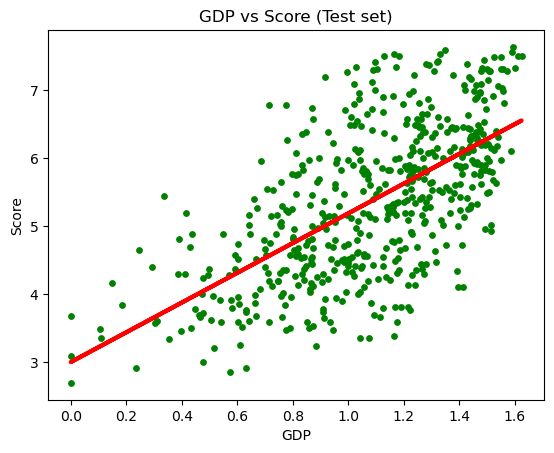

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP vs Score (Test set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Score')
plot_test.show()

# 4.2. Data prep for regression analysis
#### Health vs Score

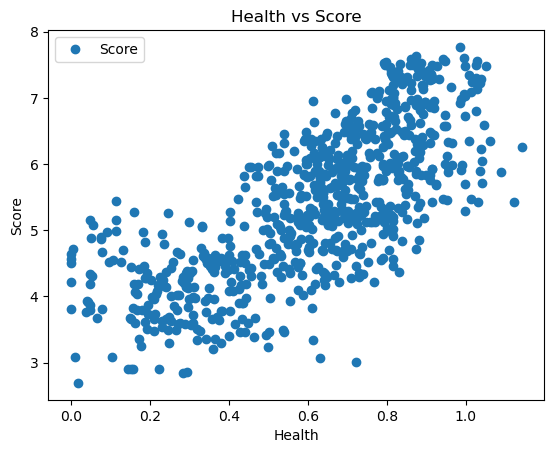

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Health', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Health vs Score')  
plt.xlabel('Health')  
plt.ylabel('Score')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Health'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [34]:
X

array([[0.94143   ],
       [0.94784   ],
       [0.87464   ],
       [0.88521   ],
       [0.90563   ],
       [0.88911   ],
       [0.89284   ],
       [0.91087   ],
       [0.90837   ],
       [0.93156   ],
       [0.91387   ],
       [0.86027   ],
       [0.89042   ],
       [0.81444   ],
       [0.86179   ],
       [0.69702   ],
       [0.91894   ],
       [0.89533   ],
       [0.89667   ],
       [0.80925   ],
       [0.90943   ],
       [0.76276   ],
       [0.72052   ],
       [1.02525   ],
       [0.79661   ],
       [0.89186   ],
       [0.85857   ],
       [0.79733   ],
       [0.94579   ],
       [0.78723   ],
       [0.84483   ],
       [0.8116    ],
       [0.69077   ],
       [0.7385    ],
       [0.72025   ],
       [0.95562   ],
       [0.88721   ],
       [0.8753    ],
       [0.72492   ],
       [0.6082    ],
       [0.61483   ],
       [0.67737   ],
       [0.64425   ],
       [0.59772   ],
       [0.78902   ],
       [0.99111   ],
       [0.96538   ],
       [0.790

In [35]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5.2. Regression analysis
#### Health vs Score

In [37]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

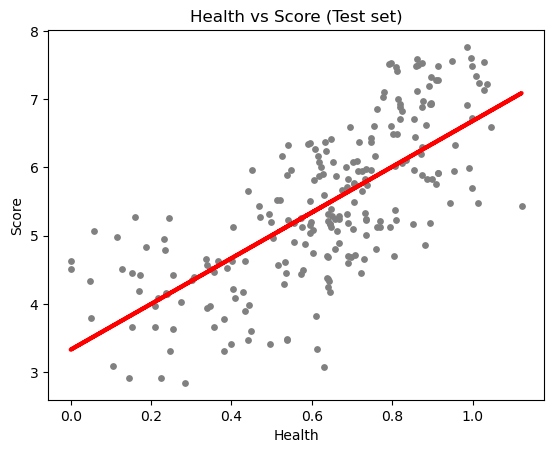

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Health vs Score (Test set)')
plot_test.xlabel('Health')
plot_test.ylabel('Score')
plot_test.show()

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.35517754]]
Mean squared error:  0.632014784039706
R2 score:  0.5190792970546504


In [43]:
y_predicted

array([[5.07204019],
       [6.07467118],
       [5.3068332 ],
       [6.21823923],
       [4.60896188],
       [5.47185713],
       [4.36017546],
       [5.54646558],
       [6.07665074],
       [5.69298619],
       [6.04984287],
       [5.49818458],
       [5.38685979],
       [5.25600787],
       [4.07820634],
       [6.30097791],
       [3.89503269],
       [5.46578841],
       [5.87352829],
       [4.89703425],
       [5.73321477],
       [4.81312443],
       [5.46402887],
       [6.24914042],
       [6.00196449],
       [6.80274471],
       [6.37663716],
       [6.66853761],
       [4.03113391],
       [6.63498583],
       [5.83645358],
       [7.09128998],
       [5.78035501],
       [4.98759366],
       [6.73564116],
       [5.12515594],
       [3.67907442],
       [5.90657679],
       [5.40291239],
       [5.38964459],
       [3.32678078],
       [6.18923153],
       [5.863295  ],
       [5.78183129],
       [6.33301985],
       [6.3745234 ],
       [5.76263967],
       [4.904

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.072040
1,6.886,6.074671
2,6.344,5.306833
3,7.119,6.218239
4,3.781,4.608962
5,4.692,5.471857
6,4.390,4.360175
7,5.061,5.546466
8,6.929,6.076651
9,5.488,5.692986


#### Compare how the regression fits the training set

In [45]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [46]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.35517754]]
Mean squared error:  0.5429812489581443
R2 score:  0.5651107962629831


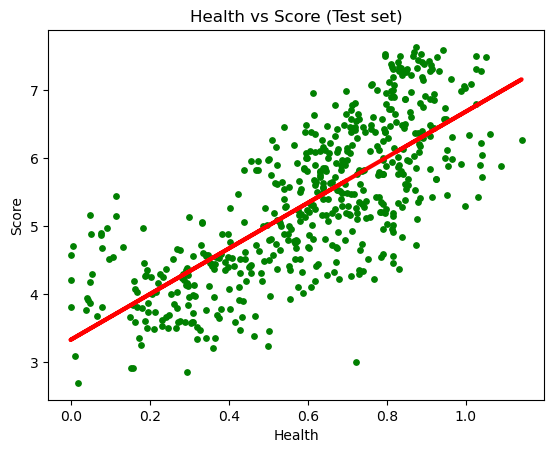

In [48]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Health vs Score (Test set)')
plot_test.xlabel('Health')
plot_test.ylabel('Score')
plot_test.show()

# 4.3. Data prep for regression analysis
#### Support vs Score

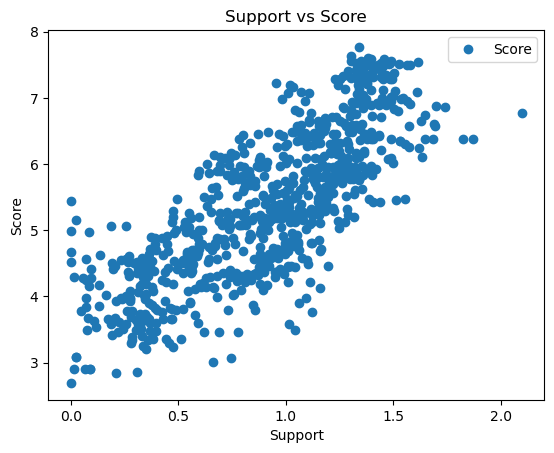

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Support', y='Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Support vs Score')  
plt.xlabel('Support')  
plt.ylabel('Score')  
plt.show()

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Support'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [51]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [52]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [53]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5.3. Regression analysis
#### Support vs Score

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

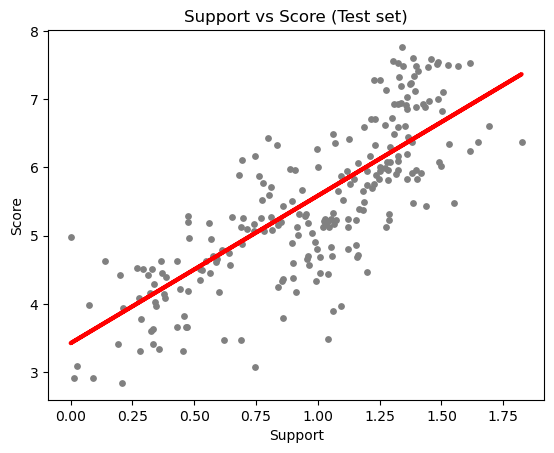

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Support vs Score (Test set)')
plot_test.xlabel('Support')
plot_test.ylabel('Score')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


In [60]:
y_predicted

array([[5.80609125],
       [6.44687622],
       [6.73379067],
       [6.43932604],
       [4.03947279],
       [5.92522839],
       [4.25537759],
       [5.02417608],
       [6.50613105],
       [5.98930082],
       [5.71924675],
       [5.94263683],
       [4.19912985],
       [5.39980284],
       [3.45557795],
       [6.36354302],
       [4.45263517],
       [5.37080656],
       [5.84749161],
       [5.27800314],
       [7.36905798],
       [3.58040467],
       [4.66425542],
       [6.36899473],
       [7.07949027],
       [6.39062848],
       [6.08126589],
       [6.4144256 ],
       [4.3550776 ],
       [6.35601448],
       [6.98988328],
       [6.53341121],
       [5.90436673],
       [3.83568289],
       [6.39928197],
       [5.60748681],
       [3.47872606],
       [5.6798517 ],
       [6.21586115],
       [6.04412074],
       [4.13691119],
       [6.44053022],
       [5.0341925 ],
       [5.71777566],
       [6.29976674],
       [6.12708616],
       [5.98175065],
       [5.179

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


#### Compare how the regression fits the training set

In [62]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.4688002885509005
R2 score:  0.6245244479606318


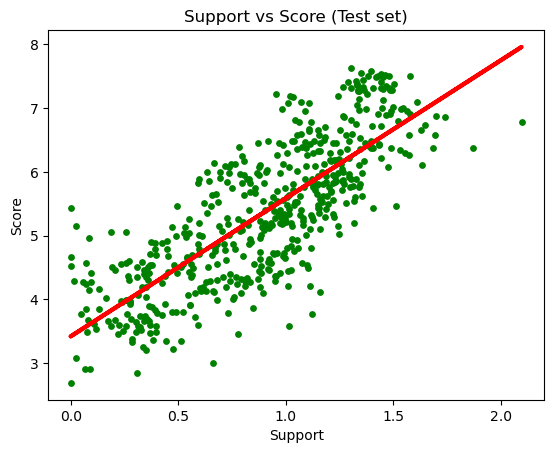

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Support vs Score (Test set)')
plot_test.xlabel('Support')
plot_test.ylabel('Score')
plot_test.show()

# 6. Results

#### GDP vs Score
    The slope of the regression line is 2.19, the mean squared error(MSE) is 0.70, and the R2 score is 0.47. The MSE is large  indicating that the regression line isn’t an accurate representation of the data. The R2 score can be interpreted as 47% and also indicates a poor fit. There’s quite the difference between the actual and predicted y values. The relationship doesn’t follow a single, straight regression line, so it won’t be able to accurately predict anything. The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.40). This means the model hasn't been overfit. However, it also confirms that the relationship isn’t purely linear.
#### Health vs Score
    The slope of the regression line is 3.36, the mean squared error(MSE) is 0.63, and the R2 score is 0.52. The MSE is large  indicating that the regression line isn’t an accurate representation of the data. The R2 score can be interpreted as 52% and also indicates a poor fit. There’s quite the difference between the actual and predicted y values. The relationship doesn’t follow a single, straight regression line, so it won’t be able to accurately predict anything. The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.57). This means the model hasn't been overfit. However, it also confirms that the relationship isn’t purely linear.
#### Support vs Score
    The slope of the regression line is 2.16, the mean squared error(MSE) is 0.50, and the R2 score is 0.616. The MSE is average  indicating that the regression line may or may not be an accurate representation of the data. The R2 score can be interpreted as 62% and also indicates a poor fit. There’s quite the difference between the actual and predicted y values. The relationship doesn’t follow a single, straight regression line, so it won’t be able to accurately predict anything. The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.624). This means the model hasn't been overfit. However, it also confirms that the relationship isn’t purely linear.
#### Conclusion
    The hypothesis "If a country has a low score in GDP, Health, and Support, then they will have a low Happiness Score," is only partially true. GDP, Health, and Support are important factors in the Happiness Score of a country, but they're not the only ones. A multiple regression model might create a more accurate representation of the data.